In [ ]:
#Prerequisites for pandas profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import os
os._exit(00)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MDI/FML1/diamonds.csv')

In [ ]:
#import pandas_profiling
from pandas_profiling import ProfileReport 
profile = ProfileReport(df, title="FML Training Results Report", html={'style' : {'full_width':True}})
profile

In [ ]:
initialShape = df.shape
initialShape

(53940, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
#checking for missing values in each column
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#Drop index column
df = df.drop(["Unnamed: 0"], axis=1)

In [ ]:
#depth is actually the total depth percentage
df = df.rename(columns={'depth': 'total_depth'})

In [ ]:
#rename dimensional columns for clarity
df = df.rename(columns={'x': 'length', 'y': 'width', 'z': 'depth'})

In [ ]:
#minimum of length,width,depth = 0 indicates faulty data since a diamond is always 3D
df = df.drop(df[df["length"]==0].index)
df = df.drop(df[df["width"]==0].index)
df = df.drop(df[df["depth"]==0].index)

#calculate how many datapoints got deleted
datapointLoss = initialShape[0] - df.shape[0]
datapointLoss

20

[Text(0.5, 1.0, 'Relationship between Carat and Price')]

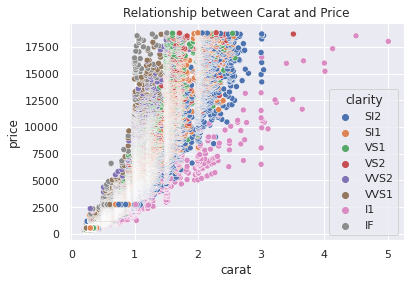

In [ ]:
sns.scatterplot(data=df, x='carat', y='price', hue="price").set(title="Relationship between Carat and Price")

[Text(0.5, 1.0, 'Distribution of Prices')]

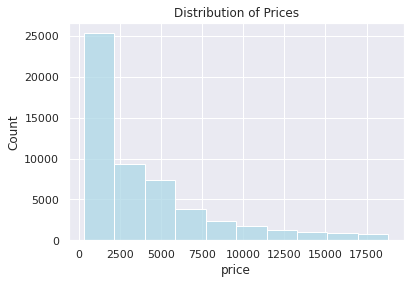

In [ ]:
sns.histplot(x='price', data=df, bins=10, color="lightblue").set(title="Distribution of Prices")

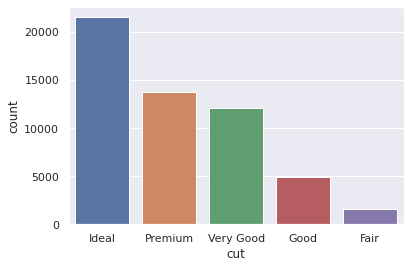

In [ ]:
#distribution for cuts
sns.countplot(x='cut', data=df, order = df.cut.value_counts().index)

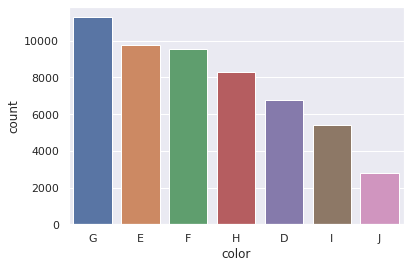

In [ ]:
#distribution for color
sns.countplot(x='color', data=df, order = df.color.value_counts().index)

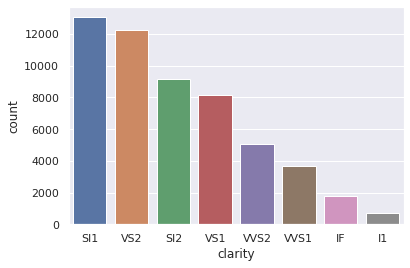

In [ ]:
#distribution for clarity
sns.countplot(x='clarity', data=df, order = df.clarity.value_counts().index)

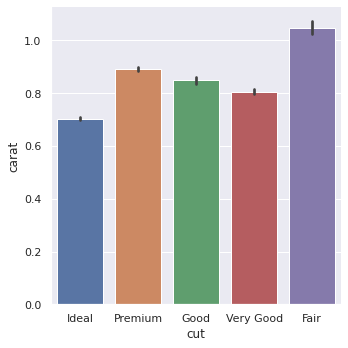

In [ ]:
sns.catplot(data=df, kind="bar", x="cut", y="carat")

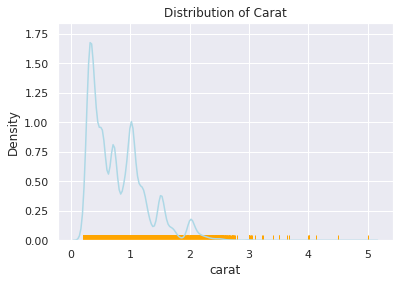

In [ ]:
sns.kdeplot(data=df, x="carat", color="lightblue").set(title="Distribution of Carat")
sns.rugplot(data=df, x="carat", color="orange")

In [ ]:
df.head()

,carat,cut,color,clarity,total_depth,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#encode categorical columns to numerical
df_encoded = df.copy()
df_encoded.cut=df_encoded.cut.astype('category').cat.codes
df_encoded.color=df_encoded.color.astype('category').cat.codes
df_encoded.clarity=df_encoded.clarity.astype('category').cat.codes

In [ ]:
df_encoded.describe()

,carat,cut,color,clarity,total_depth,table,price,length,width,depth
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,2.553079,2.594028,3.835441,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.027705,1.701272,1.724549,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


[Text(0.5, 1.0, 'Correlations between Columns')]

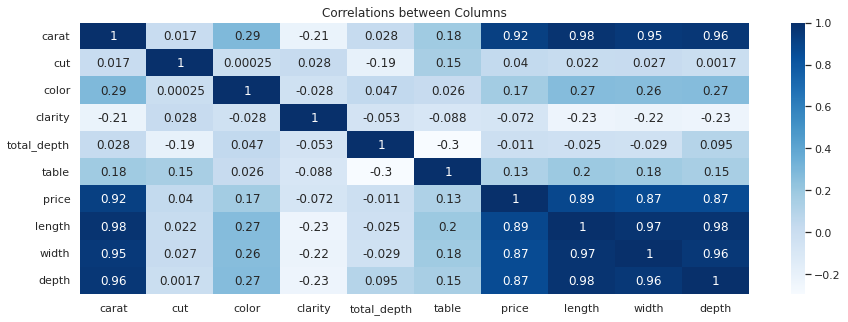

In [ ]:
#adjust size of heatmap
fig, ax = plt.subplots(figsize=(15, 5))

corr = df_encoded.corr()
sns.heatmap(corr, cmap="Blues", annot=True).set(title="Correlations between Columns")

Key findings:
*   Weak correlation between the target column price and the columns cut, clarity, total_depth

    -> These could be dropped
*   Strong correlation between dimensions and price since a bigger diamond is worth more
*   Strong correlation between carat (weight) and price since a heavier diamond is worth more

